# ①决策树 DecisionTreeClassifier

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import  datasets
from sklearn import cross_validation
import matplotlib.pyplot as plt

# 加载用于分类问题的数据集,数据集采用 scikit-learn 自带的 iris 数据

In [8]:
def load_data():
    '''
    加载用于分类问题的数据集。数据集采用 scikit-learn 自带的 iris 数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    iris=datasets.load_iris() # scikit-learn 自带的 iris 数据集
    X_train=iris.data
    y_train=iris.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
		random_state=0,stratify=y_train)# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 DecisionTreeClassifier 的用法

In [9]:
def test_DecisionTreeClassifier(*data):
    '''
    测试 DecisionTreeClassifier 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    print("Training score:%f"%(clf.score(X_train,y_train)))
    print("Testing score:%f"%(clf.score(X_test,y_test)))

# 测试 DecisionTreeClassifier 的预测性能随 criterion 参数的影响

In [10]:
def test_DecisionTreeClassifier_criterion(*data):
    '''
    测试 DecisionTreeClassifier 的预测性能随 criterion 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    criterions=['gini','entropy']
    for criterion in criterions:
        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        print("criterion:%s"%criterion)
        print("Training score:%f"%(clf.score(X_train,y_train)))
        print("Testing score:%f"%(clf.score(X_test,y_test)))

# 测试 DecisionTreeClassifier 的预测性能随划分类型的影响

In [11]:
def test_DecisionTreeClassifier_splitter(*data):
    '''
    测试 DecisionTreeClassifier 的预测性能随划分类型的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    splitters=['best','random']
    for splitter in splitters:
        clf = DecisionTreeClassifier(splitter=splitter)
        clf.fit(X_train, y_train)
        print("splitter:%s"%splitter)
        print("Training score:%f"%(clf.score(X_train,y_train)))
        print("Testing score:%f"%(clf.score(X_test,y_test)))

# 测试 DecisionTreeClassifier 的预测性能随 max_depth 参数的影响

In [12]:
def test_DecisionTreeClassifier_depth(*data,maxdepth):
    '''
    测试 DecisionTreeClassifier 的预测性能随 max_depth 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :param maxdepth: 一个整数，用于 DecisionTreeClassifier 的 max_depth 参数
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score",marker='o')
    ax.plot(depths,testing_scores,label="testing score",marker='*')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Classification")
    ax.legend(framealpha=0.5,loc='best')
    plt.show()

# 产生用于分类问题的数据集

In [21]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() 

# 调用 test_DecisionTreeClassifier

In [22]:
test_DecisionTreeClassifier(X_train,X_test,y_train,y_test) 

Training score:1.000000
Testing score:0.947368


# 调用 test_DecisionTreeClassifier_criterion

In [23]:
test_DecisionTreeClassifier_criterion(X_train,X_test,y_train,y_test) 

criterion:gini
Training score:1.000000
Testing score:0.973684
criterion:entropy
Training score:1.000000
Testing score:0.921053


# 调用 test_DecisionTreeClassifier_splitter

In [24]:
test_DecisionTreeClassifier_splitter(X_train,X_test,y_train,y_test) 

splitter:best
Training score:1.000000
Testing score:0.973684
splitter:random
Training score:1.000000
Testing score:0.973684


# 调用 test_DecisionTreeClassifier_depth

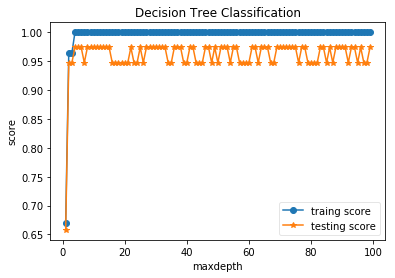

In [25]:
test_DecisionTreeClassifier_depth(X_train,X_test,y_train,y_test,maxdepth=100) 

# ②决策树 DecisionTreeRegressor

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

# 产生用于回归问题的数据集

In [33]:
def creat_data(n):
    '''
    产生用于回归问题的数据集

    :param n:  数据集容量
    :return: 返回一个元组，元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    np.random.seed(0)
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num=(int)(n/5)
    y[::5] += 3 * (0.5 - np.random.rand(noise_num)) # 每第5个样本，就在该样本的值上添加噪音
    return cross_validation.train_test_split(X, y,
		test_size=0.25,random_state=1) # 拆分原始数据集为训练集和测试集，其中测试集大小为元素数据集大小的 1/4

# 测试 DecisionTreeRegressor 的用法

In [34]:
def test_DecisionTreeRegressor(*data):
    '''
    测试 DecisionTreeRegressor 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr = DecisionTreeRegressor()
    regr.fit(X_train, y_train)
    print("Training score:%f"%(regr.score(X_train,y_train)))
    print("Testing score:%f"%(regr.score(X_test,y_test)))
    ##绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample",c='g')
    ax.scatter(X_test, y_test, label="test sample",c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

# 测试 DecisionTreeRegressor 预测性能随划分类型的影响

In [35]:
def test_DecisionTreeRegressor_splitter(*data):
    '''
    测试 DecisionTreeRegressor 预测性能随划分类型的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    splitters=['best','random']
    for splitter in splitters:
        regr = DecisionTreeRegressor(splitter=splitter)
        regr.fit(X_train, y_train)
        print("Splitter %s"%splitter)
        print("Training score:%f"%(regr.score(X_train,y_train)))
        print("Testing score:%f"%(regr.score(X_test,y_test)))

# 测试 DecisionTreeRegressor 预测性能随  max_depth 的影响

In [36]:
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    '''
    测试 DecisionTreeRegressor 预测性能随  max_depth 的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :param maxdepth: 一个整数，它作为 DecisionTreeRegressor 的 max_depth 参数
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

# 产生用于回归问题的数据集

In [37]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=creat_data(100) 
    

# 调用 test_DecisionTreeRegressor

Training score:1.000000
Testing score:0.789107


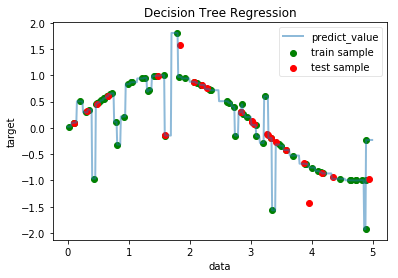

In [38]:
test_DecisionTreeRegressor(X_train,X_test,y_train,y_test) 
    

# 调用 test_DecisionTreeRegressor_splitter

In [39]:
test_DecisionTreeRegressor_splitter(X_train,X_test,y_train,y_test) 
    

Splitter best
Training score:1.000000
Testing score:0.789107
Splitter random
Training score:1.000000
Testing score:0.641796


# 调用 test_DecisionTreeRegressor_depth

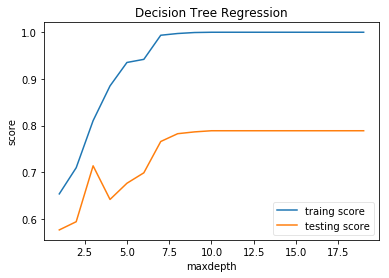

In [40]:
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=20) 